In [49]:
import pickle as pkl
from opt.eval_policy import *
from opt.mc_sim import *
import time
from common.variables import *

filename = "output/msource_value_dic_08-08-2022-16-31-47.pkl"

with open(filename, 'rb') as f:
    output_obj = pkl.load(f)

value_dic = output_obj["state_value_dic"]
model_params = output_obj["model_params"]
sourcingEnv = output_obj["mdp_env"]

sourcingEnv2 = SourcingEnv(
    lambda_arrival = model_params['mdp_env_params']['lambda'], # or 10
    procurement_cost_vec = np.array(model_params['mdp_env_params']['procurement_cost_vec']),
    supplier_lead_times_vec = np.array(model_params['mdp_env_params']['supplier_lead_times_vec']),
    on_times = np.array([1, 1]), 
    off_times = np.array([np.Inf, np.Inf]))

s_custom = MState(stock_level = 0, 
    n_suppliers = N_SUPPLIERS, 
    n_backorders = np.array([0, 0]), 
    flag_on_off = np.array([1, 1]))

In [50]:
mc_avg_costs_di = mc_with_policy(sourcingEnv2, start_state = s_custom, 
    periods = 20,
    nested_mc_iters = 20,
    big_s = model_params['policy_params']['big_s'],
    small_s = model_params['policy_params']['small_s'],
    h_cost = model_params['policy_params']['h_cost'],
    b_penalty = model_params['policy_params']['b_penalty'],
    policy_callback=dual_index_policy,
    use_tqdm = True)

print(np.mean(np.array(mc_avg_costs_di)))
print(np.median(np.array(mc_avg_costs_di)))
print(np.std(np.array(mc_avg_costs_di)))

100%|██████████| 20/20 [00:21<00:00,  1.06s/it]

37.707142857142856
36.9047619047619
26.663066402372483


In [51]:
from sim.dual_index_v1 import *
mc_avg_costs_di = mc_with_policy(sourcingEnv2, start_state = s_custom, 
    periods = 20,
    nested_mc_iters = 20,
    big_s = model_params['policy_params']['big_s'],
    small_s = model_params['policy_params']['small_s'],
    h_cost = model_params['policy_params']['h_cost'],
    b_penalty = model_params['policy_params']['b_penalty'],
    policy_callback=dual_index_policy_v1,
    use_tqdm = True)

print(np.mean(np.array(mc_avg_costs_di)))
print(np.median(np.array(mc_avg_costs_di)))
print(np.std(np.array(mc_avg_costs_di)))

100%|██████████| 20/20 [01:08<00:00,  3.44s/it]

36.738095238095234
34.976190476190474
18.451668188998962


In [52]:
mc_avg_costs_ss = mc_with_policy(sourcingEnv2, start_state = s_custom, 
    periods = 30,
    nested_mc_iters = 100,
    big_s = model_params['policy_params']['big_s'],
    small_s = model_params['policy_params']['small_s'],
    h_cost = model_params['policy_params']['h_cost'],
    b_penalty = model_params['policy_params']['b_penalty'],
    use_tqdm = True)

print(np.mean(np.array(mc_avg_costs_ss)))
print(np.median(np.array(mc_avg_costs_ss)))
print(np.std(np.array(mc_avg_costs_ss)))

100%|██████████| 100/100 [00:01<00:00, 85.86it/s]

145.58387096774194
62.87096774193549
111.15984614230472


In [53]:
model_params

{'algo_params': {'prob_epsilon': 1e-08,
  'periods': 30,
  'nested_mc_iters': 28,
  'mc_episodes': 30,
  'max_steps': 30,
  'explore_eps': 0.05,
  'debug_bool': 0,
  'fixed_learn_rate': 0.1},
 'policy_params': {'h_cost': 2,
  'b_penalty': 10,
  'small_s': 1,
  'big_s': 12,
  'n_suppliers': 2,
  'backorder_max': -10,
  'inven_limit': 30},
 'mdp_env_params': {'lambda': 10,
  'max_inven': 30,
  'action_size': 4,
  'discount_fac': 1.0,
  'procurement_cost_vec': [45, 5],
  'supplier_lead_times_vec': [0.019, 0.4],
  'on_times': [1, 1],
  'off_times': [1, 1]},
 'eval_params': {'safe_factor': 1.1,
  'n_visit_limit': 2,
  'sub_eval_periods': 30,
  'sub_nested_mc_iter': 30},
 'dual_index': {'di_safety_factor1': 5, 'delta_cand_range1': 20}}

In [54]:
model_params

{'algo_params': {'prob_epsilon': 1e-08,
  'periods': 30,
  'nested_mc_iters': 28,
  'mc_episodes': 30,
  'max_steps': 30,
  'explore_eps': 0.05,
  'debug_bool': 0,
  'fixed_learn_rate': 0.1},
 'policy_params': {'h_cost': 2,
  'b_penalty': 10,
  'small_s': 1,
  'big_s': 12,
  'n_suppliers': 2,
  'backorder_max': -10,
  'inven_limit': 30},
 'mdp_env_params': {'lambda': 10,
  'max_inven': 30,
  'action_size': 4,
  'discount_fac': 1.0,
  'procurement_cost_vec': [45, 5],
  'supplier_lead_times_vec': [0.019, 0.4],
  'on_times': [1, 1],
  'off_times': [1, 1]},
 'eval_params': {'safe_factor': 1.1,
  'n_visit_limit': 2,
  'sub_eval_periods': 30,
  'sub_nested_mc_iter': 30},
 'dual_index': {'di_safety_factor1': 5, 'delta_cand_range1': 20}}

In [55]:
output_obj

{'state_value_dic': {'[-1, 0, 0, 1, 1]': (-4383.357009039201, 488),
  '[0, 0, 0, 0, 1]': (-31.342649113471513, 4833),
  '[0, 0, 0, 1, 0]': (-31.08265599734062, 4922),
  '[-1, 0, 1, 1, 1]': (-36.39854136923744, 436),
  '[0, 0, 1, 1, 1]': (-31.185173210965157, 406),
  '[0, 0, 1, 0, 1]': (-29.480288759228475, 571),
  '[0, 0, 1, 1, 0]': (-30.472465237716012, 41),
  '[-1, 0, 2, 1, 1]': (-29.769663897388355, 337),
  '[0, 0, 2, 1, 1]': (-28.234045139141863, 282),
  '[0, 0, 2, 0, 1]': (-28.78244894428524, 569),
  '[0, 0, 2, 1, 0]': (-32.555952380952384, 37),
  '[-1, 0, 3, 1, 1]': (-28.351280102458965, 337),
  '[0, 0, 3, 1, 1]': (-28.351819947238102, 282),
  '[0, 0, 3, 0, 1]': (-29.260685006184694, 569),
  '[0, 0, 3, 1, 0]': (-28.972106571428572, 37),
  '[-1, 0, 4, 1, 1]': (-28.32584494054923, 337),
  '[0, 0, 4, 1, 1]': (-29.367326705440366, 282),
  '[0, 0, 4, 0, 1]': (-27.81028136389114, 569),
  '[0, 0, 4, 1, 0]': (-29.34292857142857, 37),
  '[-1, 0, 5, 1, 1]': (-27.72499002248715, 337),
  '[0

In [56]:
# best_small_s, best_big_s, best_val = find_opt_ss_policy_via_mc(sourcingEnv, periods = 20, nested_mc_iters = 50)
# best (s, S) policy found by MC:: (2, 5)

In [57]:
# model_params['branch_name'], model_params['git_commit']

In [58]:
# sourcingEnv = SourcingEnv(
#         lambda_arrival = 8, # or 10
#         procurement_cost_vec = np.array([3, 1, 2]),
#         supplier_lead_times_vec = np.array([0.8, 0.5, 1.0]),
#         on_times = np.array([1, 1, 2]), 
#         off_times = np.array([0.3, 1, 0.2]))

# Dual Sourcing
# sourcingEnv = SourcingEnv(
#         lambda_arrival = LAMBDA, # or 10
#         procurement_cost_vec = np.array([3, 1]),
#         supplier_lead_times_vec = np.array([0.8, 0.5]),
#         on_times = np.array([1, 1]), 
#         off_times = np.array([0.3, 1]))



# mc_avg_costs_ss = mc_with_policy(sourcingEnv2, start_state = s_custom, 
#     periods = 30,
#     nested_mc_iters = 100,
#     big_s = model_params['policy_params']['big_s'],
#     small_s = model_params['policy_params']['small_s'],
#     h_cost = model_params['policy_params']['h_cost'],
#     b_penalty = model_params['policy_params']['b_penalty'],
#     use_tqdm = True)

# print(np.mean(np.array(mc_avg_costs_ss)))

In [59]:
# mc_avg_costs = mc_with_ss_policy(sourcingEnv, 
#     periods = 100,
#     nested_mc_iters = 50,
#     big_s = 5,
#     small_s = 2,
#     h_cost = model_params['policy_params']['h_cost'],
#     b_penalty = model_params['policy_params']['b_penalty'])

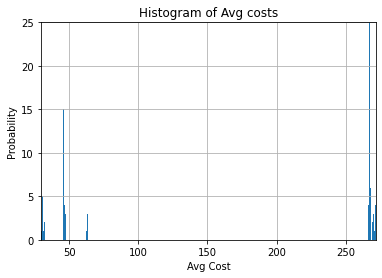

In [60]:
import matplotlib.pyplot as plt
import numpy as np

binwidth = 0.6
n, bins, patches = plt.hist(mc_avg_costs_ss, bins=np.arange( np.min(mc_avg_costs_ss), np.max(mc_avg_costs_ss) + binwidth, binwidth))
# n, bins, patches = plt.hist(mc_avg_costs, density = True)


plt.xlabel('Avg Cost')
plt.ylabel('Probability')
plt.title('Histogram of Avg costs')
plt.xlim(np.min(mc_avg_costs_ss), np.max(mc_avg_costs_ss))
plt.ylim(0, np.max(n))
plt.grid(True)
plt.show()

In [61]:
print(np.mean(np.array(mc_avg_costs_ss)))

145.58387096774194


In [62]:
print(np.median(np.array(mc_avg_costs_ss)))

62.87096774193549


In [63]:
np.std(np.array(mc_avg_costs_ss))

111.15984614230472

In [64]:
myopic_cost = mc_with_policy(sourcingEnv2, start_state = s_custom, 
    periods = 20,
    nested_mc_iters = 20,
    big_s = model_params['policy_params']['big_s'],
    small_s = model_params['policy_params']['small_s'],
    h_cost = model_params['policy_params']['h_cost'],
    b_penalty = model_params['policy_params']['b_penalty'],
    policy_callback=myopic2_policy,
    use_tqdm = True)

100%|██████████| 20/20 [01:57<00:00,  5.86s/it]


In [65]:
np.mean(myopic_cost)

49.24761904761905

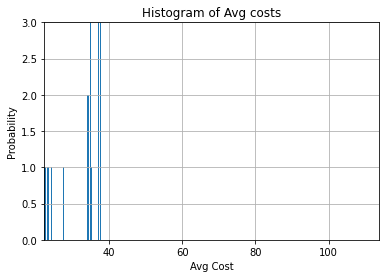

In [66]:
import matplotlib.pyplot as plt
import numpy as np

binwidth = 0.3
n, bins, patches = plt.hist(mc_avg_costs_di, bins=np.arange( np.min(mc_avg_costs_di), np.max(mc_avg_costs_di) + binwidth, binwidth))
# n, bins, patches = plt.hist(mc_avg_costs, density = True)


plt.xlabel('Avg Cost')
plt.ylabel('Probability')
plt.title('Histogram of Avg costs')
plt.xlim(np.min(mc_avg_costs_di), np.max(mc_avg_costs_di))
plt.ylim(0, np.max(n))
plt.grid(True)
plt.show()

In [67]:
single_supplier_mean_costs = []
for s in range(sourcingEnv2.n_suppliers):

    kwargs = {"periods" : 30,
        "nested_mc_iters" : 30,
        "h_cost": model_params['policy_params']['h_cost'],
        "b_penalty" : model_params['policy_params']['b_penalty'],
        "supplier_index": s
    }

    single_supplier_costs = mc_with_policy(sourcingEnv2, start_state = s_custom, 
        use_tqdm = True,
        policy_callback = single_source_orderupto_policy,
        **kwargs)
    
    single_supplier_mean_costs.append(np.mean(single_supplier_costs))


100%|██████████| 30/30 [00:08<00:00,  3.67it/s]


In [68]:
single_supplier_mean_costs

[55.45806451612904, 30.026881720430104]

In [69]:
np.min(single_supplier_mean_costs)

30.026881720430104

In [70]:
kwargs = {
    "value_dic": value_dic, 
    "periods": 10, 
    "periods_val_it": 1,
    "nested_mc_iters": 30,
    "max_stock": BIG_S,
    "discount_fac": DISCOUNT_FAC,
    "h_cost": model_params['policy_params']['h_cost'],
    "b_penalty": model_params['policy_params']['b_penalty'],
    "n_visit_lim": N_VISIT_LIM,
    "default_ss_policy": ss_policy_fastest_supp_backlog,
    "safe_factor": SAFE_FACTOR,
    "sub_eval_periods": SUB_EVAL_PERIODS,
    "sub_nested_mc_iter": SUB_NESTED_MC_ITER,
    "max_stock": 2,
    "approx_eval": True
}

mc_avg_costs = mc_with_policy(sourcingEnv2, 
    start_state = s_custom, 
    use_tqdm = True,
    policy_callback = eval_policy_from_value_dic,
    **kwargs)

100%|██████████| 30/30 [00:45<00:00,  1.51s/it]


In [71]:
np.mean(mc_avg_costs)

42.31515151515152

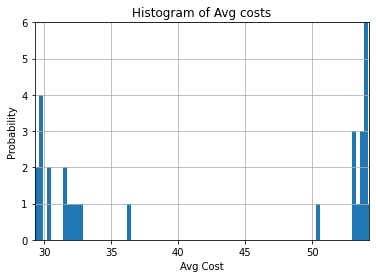

In [73]:
binwidth = 0.3
n, bins, patches = plt.hist(mc_avg_costs, bins=np.arange( np.min(mc_avg_costs), np.max(mc_avg_costs) + binwidth, binwidth))
# n, bins, patches = plt.hist(mc_avg_costs, density = True)


plt.xlabel('Avg Cost')
plt.ylabel('Probability')
plt.title('Histogram of Avg costs')
plt.xlim(np.min(mc_avg_costs), np.max(mc_avg_costs))
plt.ylim(0, np.max(n))
plt.grid(True)
plt.show()